<a href="https://colab.research.google.com/github/amanullahshah32/Deep-Learning/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0. Architecture of a classification neural network**

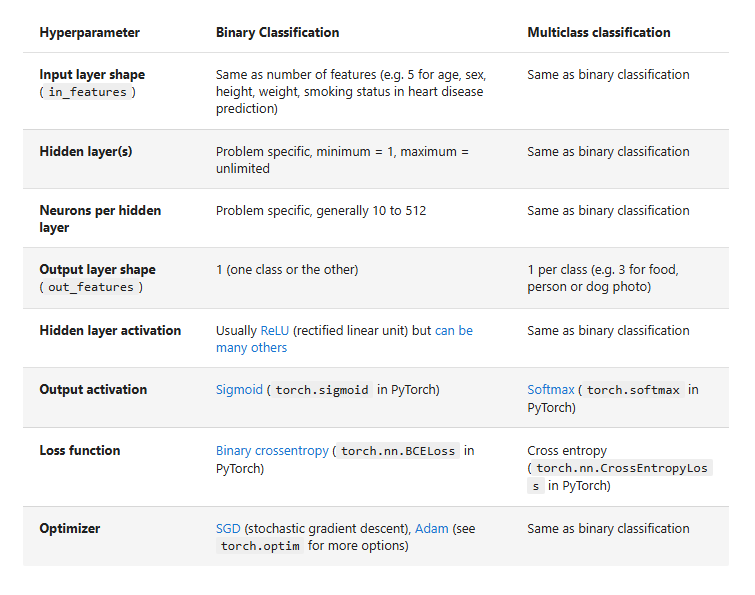

## **1. Make classification data and get it ready**

We'll use the make_circles() method from Scikit-Learn to generate two circles with different coloured dots.



In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03, # a little bit of noise to the dots
                    random_state = 42)

In [2]:
print(f"first 5 X values; {X[:5]}\n")
print(f"first 5 y values; {y[:5]}")

first 5 X values; [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

first 5 y values; [1 1 1 1 0]


Let's keep following the data explorer's motto of visualize, visualize, visualize and put them into a pandas DataFrame.



In [3]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y
                        })

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


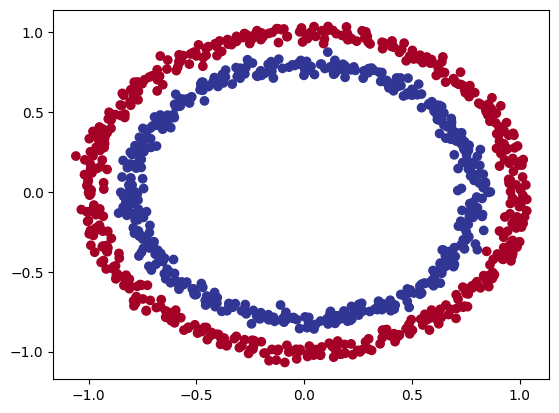

In [5]:
# Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).



### **1.1 Input and Output shapes**

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first example of features and labels
X_sample  = X[0]
y_sample  = y[0]

print(f"Values for one sample of X: {X_sample}\n")
print(f"Shapes for one sample of X: {X_sample.shape}\n")
print(f"\n Values for one sample of y: {y_sample}\n")
print(f"Shapes for one sample of y: {y_sample.shape}\n")



Values for one sample of X: [0.75424625 0.23148074]

Shapes for one sample of X: (2,)


 Values for one sample of y: 1

Shapes for one sample of y: ()



This tells us the second dimension for X means it has two features (vector) where as y has a single feature (scalar).

We have two inputs for one output.

### **1.2 Turn data into tensors and create train and test splits**

1. Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).
2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).

In [8]:
# Turn data into tensors
# Otherwise this causes issues with computations later on

import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# check the length of train, test splits
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## **2. Building a model**

We'll break it down into a few parts.

Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
* Constructing a model by subclassing nn.Module.
* Defining a loss function and optimizer.
* Creating a training loop (this'll be in the next section).

In [10]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Let's create a model class that:

1. Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
2. Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a forward() method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target device.

In [11]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layers capable of handling X and Y input and output shapes
    self.layer_1 = nn.Linear(in_features = 2, out_features= 5) # takes in 2 features (x) , priduces 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features , produces 1 feature jy

  # 3. Define a forward method containing the forward pass computation
  def forward(self,x):
    # Return the output of layer_2 , a single feature, the same shape as y
    return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2



# 4. create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

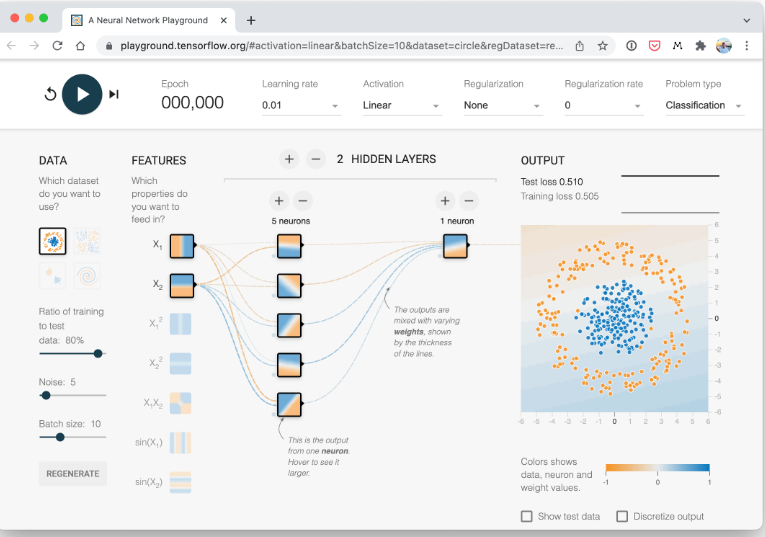

A visual example of what a similar classificiation neural network to the one we've just built looks like. Try create one of your own on the TensorFlow Playground website. : https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.35990&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

`nn.Sequential` performs a forward pass computation of the input data through the layers in the order they appear

In [12]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features= 5),
    nn.Linear(in_features = 5, out_features= 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

Now we've got a model, let's see what happens when we pass some data through it.



In [13]:
# Make predictions with the model

untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}\n")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\n First 10 predictions: \n{untrained_preds[:10]}")
print(f"\n First 10 test labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])

Length of test samples: 200, Shape: torch.Size([200])

 First 10 predictions: 
tensor([[0.6988],
        [0.6242],
        [0.7961],
        [0.6716],
        [0.6402],
        [0.5959],
        [0.5095],
        [0.5025],
        [0.8025],
        [0.6175]], device='cuda:0', grad_fn=<SliceBackward0>)

 First 10 test labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### **2.1 Setup loss function and optimizer**

 the stochastic gradient descent optimizer `(SGD, torch.optim.SGD())` can be used for a range of problems, and the same applies to the Adam optimizer `(torch.optim.Adam())`.

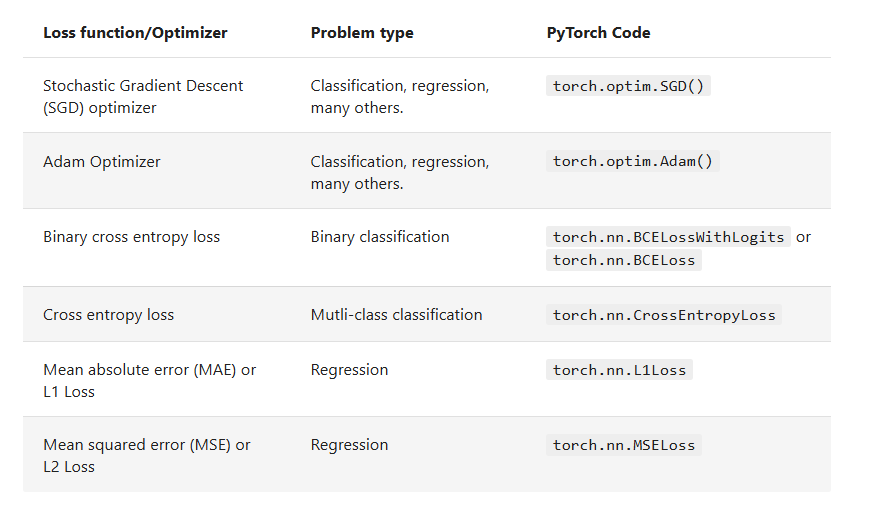

PyTorch has two binary cross entropy implementations:

1. torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).

In [14]:
# Create a loss function
# Loss_fn = nn.BCELoss() # BCELoss = no sigmoid built it
loss_fn = nn.BCEWithLogitsLoss() # BSEWithLogitsLoss = sigmoid built in

# Create an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

Now let's also create an evaluation metric.

Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions.



In [15]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are euqal
  acc = (correct / len(y_pred)) * 100
  return acc

## **3. Train Model**

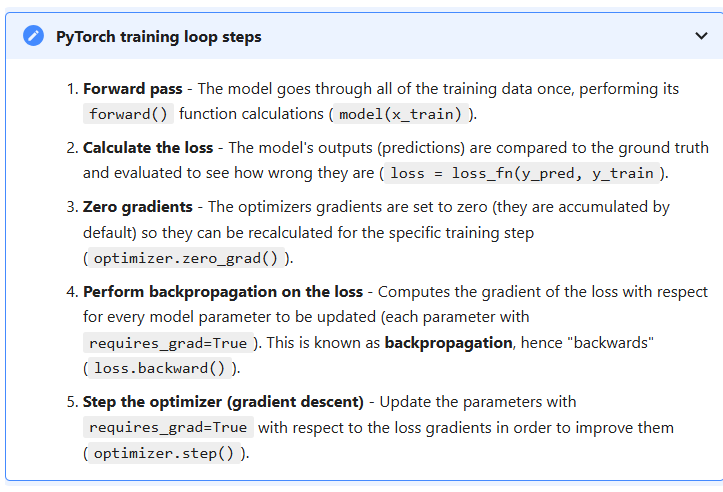

### 3.1 Going from raw model outputs to predicted labels (logits -> prediciotn probabilites -> predictioan labels)

In [16]:
# View the first 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.6988],
        [0.6242],
        [0.7961],
        [0.6716],
        [0.6402]], device='cuda:0', grad_fn=<SliceBackward0>)

y
=
x
⋅
W
e
i
g
h
t
s
T
+
b
i
a
s

The raw outputs (unmodified) of this equation (
y
 ) and in turn, the raw outputs of our model are often referred to as logits.

To get our model's raw outputs (logits) into such a form, we can use the sigmoid activation function.

In [17]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6679],
        [0.6512],
        [0.6891],
        [0.6619],
        [0.6548]], device='cuda:0', grad_fn=<SigmoidBackward0>)

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

If y_pred_probs >= 0.5, y=1 (class 1)


If y_pred_probs < 0.5, y=0 (class 0)

In [18]:
# Find the predicted labels (round the prediction probabilites )
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# CHeck for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

### 3.2 Building a training and testing loop

Let's start by training for 100 epochs and outputting the model's progress every  10 epochs

In [19]:
torch.manual_seed(42)

# Set the number of epochs
epochs  = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### training
  model_0.train()

  # 1. Forward pass (model outputs raw logits)
  y_logits= model_0(X_train).squeeze() # Squeeze to remove extra 1 dimension, this wont work unless model and data are on same device
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits ->  pred prbs -> pred labels

  #3 Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # using nn.BCELoss you need torch.sigmoid()
  loss = loss_fn(y_logits, y_train) # using nn.BCEWithLogitsLoss works with raw logits

  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backwards
  loss.backward()

  # 5. optimizer step
  optimizer.step()


  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass:
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate loss/accuracy
    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy_fn(y_true=y_test, y_pred = test_pred)

    # Print out what's happening in every 10 epochs
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.75031, Acc: 50.00% | Test Loss: 0.74088, Test Acc: 50.00%
Epoch: 10 | Loss: 0.71209, Acc: 50.00% | Test Loss: 0.71078, Test Acc: 50.00%
Epoch: 20 | Loss: 0.69993, Acc: 50.00% | Test Loss: 0.70156, Test Acc: 50.00%
Epoch: 30 | Loss: 0.69599, Acc: 59.50% | Test Loss: 0.69867, Test Acc: 55.50%
Epoch: 40 | Loss: 0.69465, Acc: 53.25% | Test Loss: 0.69765, Test Acc: 51.50%
Epoch: 50 | Loss: 0.69413, Acc: 51.75% | Test Loss: 0.69718, Test Acc: 48.50%
Epoch: 60 | Loss: 0.69388, Acc: 51.50% | Test Loss: 0.69686, Test Acc: 48.50%
Epoch: 70 | Loss: 0.69374, Acc: 51.62% | Test Loss: 0.69659, Test Acc: 51.00%
Epoch: 80 | Loss: 0.69363, Acc: 50.75% | Test Loss: 0.69636, Test Acc: 50.50%
Epoch: 90 | Loss: 0.69355, Acc: 50.62% | Test Loss: 0.69615, Test Acc: 49.00%


## **4. Make predictions and evaluate the model**

In [21]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

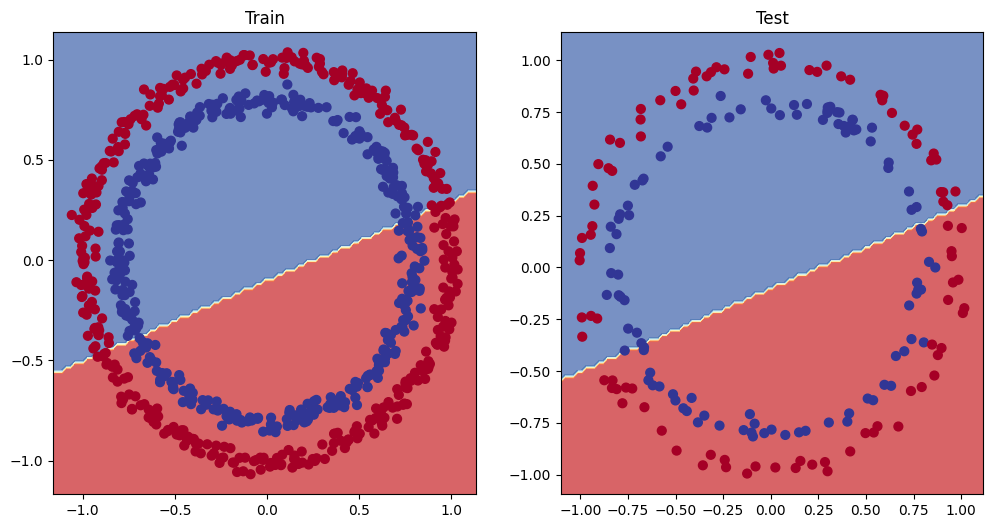

In [22]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## **5. Improving a modek (from a model prespective)**